In [0]:
from keras import Sequential
from google.colab import files
import pandas as pd
from keras.layers import Dense, Conv2D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras.layers.convolutional import MaxPooling2D
from sklearn.model_selection import train_test_split
import numpy as np
from keras.datasets import mnist

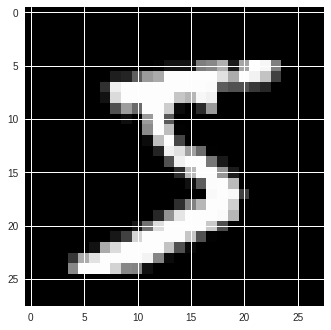

In [0]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()
plt.imshow(X_train[0], cmap = 'gray')

In [0]:
X_train.shape[0]

60000

In [0]:
X_test.shape

(10000, 28, 28)

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
print('The training Data Shape', X_train.shape)

The training Data Shape (60000, 28, 28, 1)


In [0]:
print('The test Data Shape', y_test.shape)

The test Data Shape (10000,)


In [0]:
# Normalization
X_train = X_train/255
X_test = X_test/255

# one hot output: 10 Classes into a vector of probabilities

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print('The test Data Shape', y_test.shape)

The test Data Shape (10000, 10)


In [0]:
num_classes = y_test.shape[1]

In [0]:
# the model
cf = Sequential()
cf.add(Conv2D(32, kernel_size = (5,5), activation = 'relu', input_shape = (28,28,1)))
cf.add(BatchNormalization())
#cf.add(MaxPooling2D(pool_size=(2, 2)))
cf.add(Conv2D(64, kernel_size = (5,5), activation = 'relu'))
cf.add(MaxPooling2D(pool_size=(2, 2)))
cf.add(BatchNormalization())

cf.add(Conv2D(128, kernel_size = (5,5), activation = 'relu'))
cf.add(Dropout(0.3))

cf.add(BatchNormalization())

cf.add(Conv2D(256, kernel_size = (5,5), activation = 'relu'))
cf.add(MaxPooling2D(pool_size=(2, 2)))
cf.add(BatchNormalization())


cf.add(Conv2D(256, kernel_size = (1,1), activation = 'relu'))
cf.add(Dropout(0.3))
cf.add(BatchNormalization())

cf.add(Flatten())
cf.add(Dense(256, activation = 'relu'))
cf.add(Dropout(0.3))
cf.add(BatchNormalization())
cf.add(Dense(num_classes, activation='softmax'))
cf.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
batch_normalization_17 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 20, 20, 64)        51264     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
batch_normalization_18 (Batc (None, 10, 10, 64)        256       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 6, 6, 128)         204928    
_________________________________________________________________
dropout_16 (Dropout)         (None, 6, 6, 128)         0         
__________

In [0]:
cf.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
cf.fit(X_train,y_train, validation_data=(X_test, y_test), epochs=12)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 66s 1ms/step - loss: 0.1473 - acc: 0.9555 - val_loss: 0.0405 - val_acc: 0.9873
Epoch 2/12
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0694 - acc: 0.9801 - val_loss: 0.0363 - val_acc: 0.9889
Epoch 3/12
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0535 - acc: 0.9842 - val_loss: 0.0510 - val_acc: 0.9840
Epoch 4/12
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0458 - acc: 0.9867 - val_loss: 0.0235 - val_acc: 0.9926
Epoch 5/12
60000/60000 [==============================] - 66s 1ms/step - loss: 0.0372 - acc: 0.9891 - val_loss: 0.0285 - val_acc: 0.9917
Epoch 6/12
60000/60000 [==============================] - 66s 1ms/step - loss: 0.0344 - acc: 0.9902 - val_loss: 0.0259 - val_acc: 0.9927
Epoch 7/12
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0265 - acc: 0.9920 - val_loss: 0.0218 - val_acc

In [0]:
cf.save('cnn.h5')

[4.0552766e-07 1.2572580e-06 9.9998569e-01 1.2038460e-07 4.6062303e-07
 1.6011534e-09 6.6512149e-07 3.9434588e-07 1.0698796e-05 3.0544726e-07]


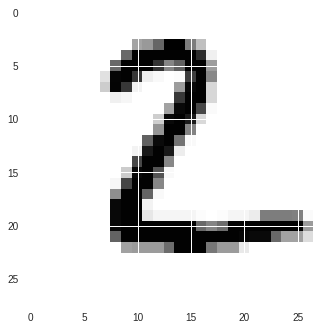

In [0]:
digit = cf.predict(X_test)
print(digit[1])
sample = X_test[1].reshape(28,28)
plt.imshow(sample)

In [0]:
test = pd.read_csv('test.csv')
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
def data_preparation(data):
    test_array = []
    test_data = data.values
    for image in test_data:
        image_resized = np.reshape(image, (28,28,1))
        test_array.append(image_resized)
        
    test_images = np.asarray(test_array)
    
    assert len(test_images)== len(test_data)
    
    test_images = test_images/255
    
    return test_images
        
    
test_images = data_preparation(test)

In [0]:
digit_predictions = cf.predict(test_images)

In [0]:
labels = []
for image_id, digit in enumerate(digit_predictions, 1):
    label = np.argmax(digit)
    labels.append((image_id,label))
    
print(len(labels))

28000


In [0]:
results = pd.DataFrame(labels, columns = ['ImageId', 'Label'])

In [0]:
results.to_csv('digits.csv', index = False)